MIE424 (2022 Winter) Lab 5
======

In [1]:
import numpy as np
import time
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.linalg as la

Visualizing Projected Gradient Descent
======



In [2]:
def generate_data(num_samples, num_features, num_nonneg, nonneg_value, noise):
    beta_star = np.random.randn(num_features)-5
    beta_star[0:num_nonneg] = nonneg_value
    X = 10*np.random.randn(num_samples, num_features)
    Y = np.matmul(X,beta_star)+noise*np.random.randn(num_samples)
    return X, Y, beta_star

def nonneg_project(u, S):
    v = np.array(u)
    uS = v[S]
    uS[uS<0] = 0
    v[S] = uS
    return v

def loss(beta):
    return np.sum((Y.reshape((Y.shape[0],1))-X.dot(beta))**2,axis=0)/2

def nonneg_OLS(X, Y, S, max_iter):
    n, d = X.shape
    w, v = np.linalg.eig(np.matmul(np.transpose(X),X))
    L    = np.max(w)
    betas= np.zeros((max_iter+1,d))

    XTX  = np.matmul(np.transpose(X),X)
    XTY  = np.matmul(np.transpose(X),Y)
        
    beta = np.zeros(d)
    betas[0,:] = beta
    for i in range(max_iter):
        beta         = nonneg_project(beta-(1/L)*(np.matmul(XTX, beta) - XTY), S)
        betas[i+1,:] = beta
    return beta, betas

def OLS(X, Y, max_iter):
    n, d = X.shape
    w, v = np.linalg.eig(np.matmul(np.transpose(X),X))
    L    = np.max(w)
    betas= np.zeros((max_iter+1,d))

    XTX  = np.matmul(np.transpose(X),X)
    XTY  = np.matmul(np.transpose(X),Y)
        
    beta = np.zeros(d)
    betas[0,:] = beta
    for i in range(max_iter):
        beta         = beta-(1/L)*(np.matmul(XTX, beta) - XTY)
        betas[i+1,:] = beta
    return beta, betas

In [3]:
# use the np.random.seed to fix the generated data
np.random.seed(424)
X, Y, beta_star = generate_data(100,2,1,0.05,100)

In [4]:
beta_hat, betas = nonneg_OLS(X,Y,np.arange(1),10)

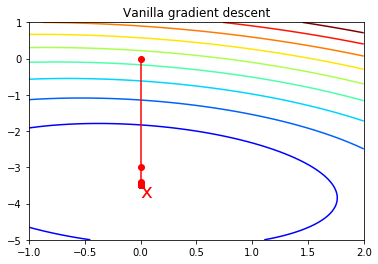

In [5]:
beta_hat, betas = nonneg_OLS(X,Y,np.arange(1),10)
x = np.linspace(-1, 2, 100)
y = np.linspace(-5, 1, 100)
X_plot, Y_plot = np.meshgrid(x, y)
Z = loss(np.vstack([X_plot.ravel(), Y_plot.ravel()])).reshape((100,100))
Zmin = np.min(Z)
Zmax = np.max(Z)
plt.contour(X_plot, Y_plot, Z, np.arange(10)/10*(Zmax-Zmin)+Zmin, cmap='jet')
plt.text(beta_star[0], beta_star[1], 'x', va='center', ha='center', color='red', fontsize=20)
plt.plot(betas[:, 0], betas[:, 1], 'o-', c='red')
plt.title('Non Negative gradient descent')
pass

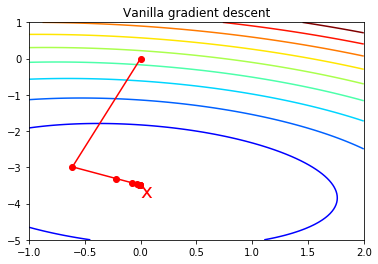

In [6]:
beta_hat, betas = OLS(X,Y,10)
x = np.linspace(-1, 2, 100)
y = np.linspace(-5, 1, 100)
X_plot, Y_plot = np.meshgrid(x, y)
Z = loss(np.vstack([X_plot.ravel(), Y_plot.ravel()])).reshape((100,100))
Zmin = np.min(Z)
Zmax = np.max(Z)
plt.contour(X_plot, Y_plot, Z, np.arange(10)/10*(Zmax-Zmin)+Zmin, cmap='jet')
plt.text(beta_star[0], beta_star[1], 'x', va='center', ha='center', color='red', fontsize=20)
plt.plot(betas[:, 0], betas[:, 1], 'o-', c='red')
plt.title('Vanilla gradient descent')
pass

Comparing computation cost of parenthesizing matrix products 
======

In this section, we experiment with the computation cost of calculating $X^TXw$, where $X$ is a $n\times d$ matrix, $w$ is a $d\times1$ vector.

As discussed in the lecture, there are two ways that one can compute the product:

Method 1: $(X^TX)w$

First compute $A = X^TX$, then compute $Aw$.

Method 2: $X^T(Xw)$

First compute $b = Xw$, then compute $X^Tb$.

First, generate $X$ and $w$ using `np.random.randn`:

In [7]:
def generate_data(n=int(1e4),d=int(5e3)):
    X = np.random.randn(n,d)
    w = np.random.randn(d,1)
    return X, w

In [8]:
# use the np.random.seed to fix the generated data
np.random.seed(4242022)
X, w = generate_data()

This would be a relatively large dataset:

In [9]:
print(f"Memory size of X is about: {X.nbytes/(1024)**2} MB.")

Memory size of X is about: 381.4697265625 MB.


**Exercise:** 

Complete the following function `computation1`, `computation2` to implement the two methods above.

In [10]:
def computation1 (X, w):
    #### FILL IN ####
    return None

In [11]:
def computation2 (X, w):
    #### FILL IN ####
    return None

Sanity check: if the results returned from the two methods above are the same.

In [12]:
def check_consistent_results (X, w, method1, method2):
    
    result1 = computation1(X, w)
    result2 = computation2(X, w)
    
    return bool(np.product(result1==result2))

In [13]:
check_consistent_results (X, w, computation1, computation2)

False

Does this mean our codes are not correct? Let's evaluate the actual difference:

In [14]:
def check_results_difference (X, w, method1, method2):
    
    result1 = computation1(X, w)
    result2 = computation2(X, w)
    
    return np.linalg.norm(result1-result2)

In [15]:
check_results_difference (X, w, computation1, computation2)

1.5470065122820128e-09

**Exercise:** 

Alter the function to incorporate tolerance.

In [16]:
def check_consistent_results_with_tolerance (X, w, method1, method2, tol = 1e-12):
    
    result1 = computation1(X, w)
    result2 = computation2(X, w)
    
    #### FILL IN ####
    return None

In [17]:
check_consistent_results_with_tolerance (X, w, computation1, computation2)

True

Now let's evaluate the computational cost of these two different approaches:

In [18]:
def timing_computation(X, w, method):
    tic = time.time()
    method(X,w)
    duration = time.time() - tic
    print(f"Computation time cost: {duration} seconds.")
    return duration

In [19]:
time1 = timing_computation(X, w, computation1)
time2 = timing_computation(X, w, computation2)
print(f"Method 2 is {time1/time2-1} times faster than method 1.")

Computation time cost: 3.1991701126098633 seconds.
Computation time cost: 0.0455169677734375 seconds.
Method 2 is 69.2852204156889 times faster than method 1.


Gradient Descent with Non-convex Functions
======
In this section, we apply gradient descent method trying to minimize the following function:

$f(x)=100(x_2-x_1^2)^2+(1-x_1)^2$

This function is a special case of rosenbrock (banana) function.

In [20]:
def rosen(x):
    """
    The Rosenbrock function.
    The function computed is::
        sum(100.0*(x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0)
        
    Parameters
    x : array of points at which the Rosenbrock function is to be computed.
    
    Returns
    r : float. The value of the Rosenbrock function.
    """
    r = np.sum(100.0 * (x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0,axis=0)
    return r

**Exercise:** 

Code the gradient of rosenbrock function:

In [21]:
def rosen_grad(x):
    """
    The derivative (i.e. gradient) of the Rosenbrock function.
    
    Parameters
    x : array of points at which the derivative is to be computed.
        
    Returns
    rosen_grad : (N,) ndarray
        The gradient of the Rosenbrock function at `x`.
    """
    #### FILL IN:
    grad_x1 = None 
    grad_x2 = None
    return np.array([grad_x1,grad_x2])

Check if your codes are correct:

In [22]:
# use the np.random.seed to fix the generated data
np.random.seed(4242021)
for x in np.random.uniform(-2,2,(10,2)):
    print(x, opt.check_grad(rosen, rosen_grad, x))

[ 1.31543792 -0.68565015] 1.969560366416445e-05
[1.99018777 0.18375398] 1.4238076578208733e-05
[-1.27145898 -0.24309171] 1.1263845782488468e-05
[-0.14347088  1.14465326] 5.67235313979217e-06
[-0.25509439 -0.49192335] 2.2040748184545294e-06
[-0.01927951  1.21339502] 5.101649720777197e-06
[-0.36440224  0.78641842] 2.240756078107898e-06
[-0.01521241 -1.1745241 ] 1.8122945855386832e-06
[-1.99183942 -1.46266443] 1.4642754998152777e-05
[-1.13488167  0.92250244] 9.024082546875058e-06


**Question:** 

What's the global minimum for the function $f(x)=100(x_2-x_1^2)^2+(1-x_1)^2$?

In [23]:
#### FILL IN:
x_star = np.array([None,None])

In [24]:
rosen(x_star)

0.0

In [25]:
rosen_grad(x_star)

array([0, 0])

Visualize $f(x)$ by contour.

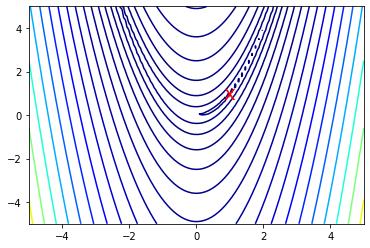

In [26]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = rosen(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
plt.contour(X, Y, Z, np.arange(20)**4, cmap='jet')
plt.text(x_star[0], x_star[1], 'x', va='center', ha='center', color='red', fontsize=20)
pass

Zooming in to the global minimum `x_star`

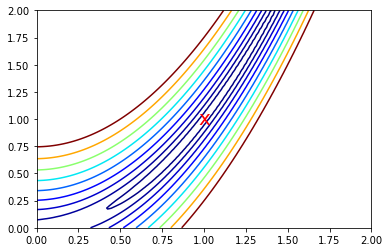

In [27]:
x = np.linspace(0, 2, 100)
y = np.linspace(0, 2, 100)
X, Y = np.meshgrid(x, y)
Z = rosen(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
plt.contour(X, Y, Z, [rosen(np.array([k, k])) for k in np.linspace(1, 1.5, 10)], cmap='jet')
plt.text(x_star[0], x_star[1], 'x', va='center', ha='center', color='red', fontsize=20)
pass

**Exercise:** 

Complete the update rule in the gradient descent funciton `gd()`.

In [28]:
def gd(x, grad, alpha, max_iter=10):
    xs = np.zeros((1 + max_iter, x.shape[0]))
    xs[0,:] = x
    for i in range(max_iter):
        
        #### FILL IN:
        x = None
        
        xs[i+1,:] = x
    return xs

In [29]:
alpha = 0.0002
x0 = np.array([4,-4])
xs = gd(x0, rosen_grad, alpha, max_iter=100)

In [30]:
print(xs[-1,:])

[ 0.01775411 -0.05095486]


Let's visualize the iterates of the gradient descent.

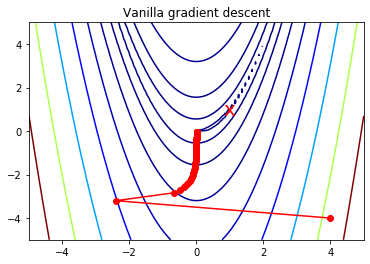

In [31]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = rosen(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
plt.contour(X, Y, Z, np.arange(10)**5, cmap='jet')
plt.text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20)
plt.plot(xs[:, 0], xs[:, 1], 'o-', c='red')
plt.title('Vanilla gradient descent')
pass

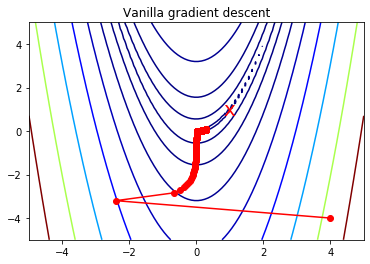

In [32]:
alpha = 0.0002
x0 = np.array([4,-4])
xs = gd(x0, rosen_grad, alpha, max_iter=1000)

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = rosen(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
plt.contour(X, Y, Z, np.arange(10)**5, cmap='jet')
plt.text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20)
plt.plot(xs[:, 0], xs[:, 1], 'o-', c='red')
plt.title('Vanilla gradient descent')
pass

Iterations: 1000
Iterations: 2000
Iterations: 3000
Iterations: 4000
Iterations: 5000
Iterations: 6000
Iterations: 7000
Iterations: 8000
Iterations: 9000
Iterations: 10000


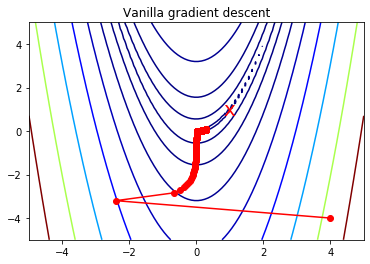

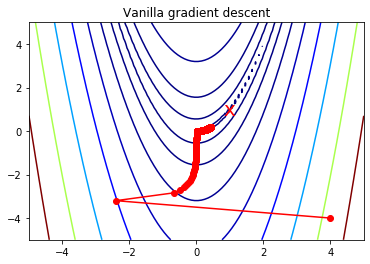

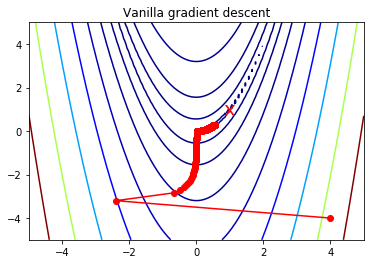

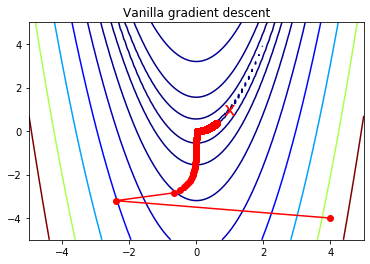

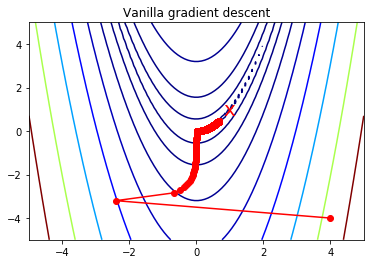

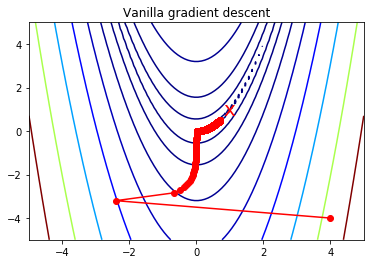

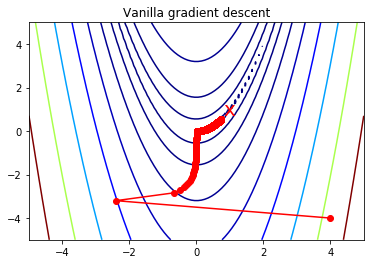

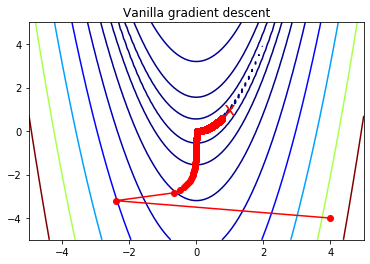

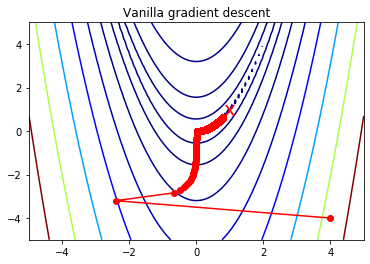

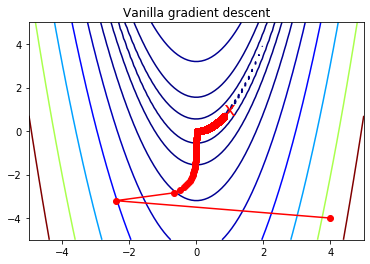

In [33]:
alpha = 0.0002
x0 = np.array([4,-4])
for i in range(10):
    print(f'Iterations: {1000+i*1000}')
    plt.figure(i)
    xs = gd(x0, rosen_grad, alpha, max_iter=1000*(1+i))
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = rosen(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
    plt.contour(X, Y, Z, np.arange(10)**5, cmap='jet')
    plt.text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20)
    plt.plot(xs[:, 0], xs[:, 1], 'o-', c='red')
    plt.title('Vanilla gradient descent')
    pass

Now let's consider increasing the stepsize:

In [ ]:
alpha = 0.0003
x0 = np.array([4,-4])
xs = gd(x0, rosen_grad, alpha, max_iter=10)
xs

What about adapatively increase the stepsize? For example, $\alpha=\alpha_0 \sqrt{k}$ for the $k$th iterate.

In [35]:
def adaptive_gd(x, grad, alpha, max_iter=10):
    xs = np.zeros((1 + max_iter, x.shape[0]))
    xs[0,:] = x
    for i in range(max_iter):
        x = x - alpha*i**0.5 * grad(x)
        xs[i+1,:] = x
    return xs

[0.83120453 0.68990336]


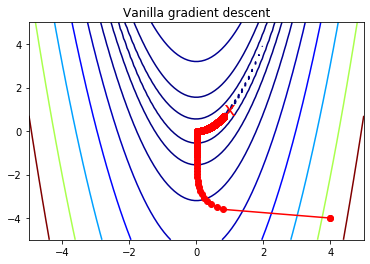

In [36]:
alpha = 0.0001
x0 = np.array([4,-4])
xs = adaptive_gd(x0, rosen_grad, alpha, max_iter=1000)

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = rosen(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
plt.contour(X, Y, Z, np.arange(10)**5, cmap='jet')
plt.text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20)
plt.plot(xs[:, 0], xs[:, 1], 'o-', c='red')
plt.title('Adaptive step size gradient descent')
print(xs[-1,:])

Using `scipy.optimize` to implement gradient descent and visualize the change of function value and norm of gradient.

In [38]:
def custmin(fun, x0, args=(), maxfev=None, alpha=0.0002,
        maxiter=100000, tol=1e-10, callback=None, **options):
    """Implements simple gradient descent for the Rosen function."""
    bestx = x0
    bestf = fun(x0)
    funcalls = 1
    niter = 0
    improved = True
    stop = False

    while improved and not stop and niter < maxiter:
        niter += 1
        # the next 2 lines are gradient descent
        step = alpha * rosen_grad(bestx)
        bestx = bestx - step

        bestf = fun(bestx)
        funcalls += 1

        if la.norm(step) < tol:
            improved = False
        if callback is not None:
            callback(bestx)
        if maxfev is not None and funcalls >= maxfev:
            stop = True
            break

    return opt.OptimizeResult(fun=bestf, x=bestx, nit=niter,
                              nfev=funcalls, success=(niter > 1))
def reporter(p):
    """Reporter function to capture intermediate states of optimization."""
    global ps
    ps.append(p)

In [39]:
x0 = np.array([4,-4.1])
ps = [x0]
opt.minimize(rosen, x0, method=custmin, callback=reporter)

     fun: 1.0604663473471188e-08
    nfev: 100001
     nit: 100000
 success: True
       x: array([0.9998971 , 0.99979381])

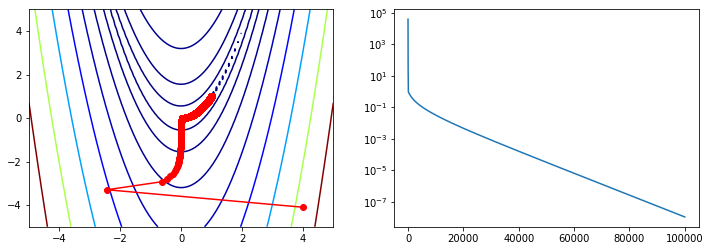

In [41]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = rosen(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
ps = np.array(ps)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.contour(X, Y, Z, np.arange(10)**5, cmap='jet')
plt.plot(ps[:, 0], ps[:, 1], '-ro')
plt.subplot(122)
plt.semilogy(range(len(ps)), rosen(ps.T))
pass

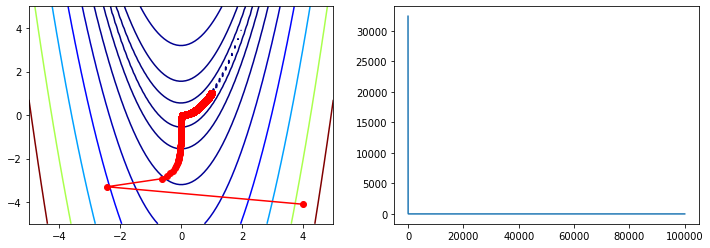

In [42]:
ps = np.array(ps)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.contour(X, Y, Z, np.arange(10)**5, cmap='jet')
plt.plot(ps[:, 0], ps[:, 1], '-ro')
plt.subplot(122)
plt.plot(range(len(ps)), np.sqrt(np.sum(rosen_grad(ps.T)**2,axis=0)))
pass

Now let's take a closer look at this type of function:
$$f_a(x)=a(x_2-x_1^2)^2+(1-x_1)^2$$

In [43]:
def rosen_hess(x):
    H = np.diag(-400 * x[:-1], 1) - np.diag(400 * x[:-1], -1)
    diagonal = np.zeros(len(x), dtype=x.dtype)
    diagonal[0] = 1200 * x[0]**2 - 400 * x[1] + 2
    diagonal[-1] = 200
    diagonal[1:-1] = 202 + 1200 * x[1:-1]**2 - 400 * x[2:]
    H = H + np.diag(diagonal)
    return H

In [44]:
H = rosen_hess(x_star)
np.linalg.cond(H)

2508.009601277298

**Take-home Exercise**:

1. Use gradient descent for minimizing $f_a(x)$ for $a=10,1,0.1,0.01$. Compute the condition number of the Hessian of $f_a(x)$.

2. Use JAX (we've seen in Lab 5) to implement the experiment (third section) and complete the above question.